# Oasis Infobyte

# Data Science Internship

# Bushra Rahman

# Task - 4 EMAIL SPAM DETECTION WITH MACHINE LEARNING

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Importing Dataset

In [2]:
e_data = pd.read_csv("spam.csv", encoding= 'ISO-8859-1')

In [3]:
e_data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
e_data.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
e_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
e_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
e_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
e_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [10]:
e_data.columns

Index(['v1', 'v2'], dtype='object')

In [11]:
e_data.value_counts()

v1    v2                                                                                                                                                                                                           
ham   Sorry, I'll call later                                                                                                                                                                                           30
      I cant pick the phone right now. Pls send a message                                                                                                                                                              12
      Ok...                                                                                                                                                                                                            10
spam  Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 

In [12]:
e_data['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
e_data['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [14]:
e_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [15]:
e_data.shape

(5572, 2)

In [16]:
e_data.size

11144

In [17]:
e_data.duplicated().sum()

403

# Splitting the data into features and labels

In [18]:
X = e_data['v2']
y = e_data['v1']

In [19]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [20]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

# Converting text into numerical features

In [21]:
cv = CountVectorizer()

In [22]:
X = cv.fit_transform(X)

In [23]:
print(X)

  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1
  (1, 5504)	1
  (1, 4512)	1
  (1, 4318)	1
  (1, 8392)	1
  (1, 5533)	1
  (2, 4087)	1
  (2, 3358)	1
  :	:
  (5570, 4218)	1
  (5570, 8313)	1
  (5570, 1084)	1
  (5570, 4615)	1
  (5570, 7039)	1
  (5570, 3308)	1
  (5570, 7627)	1
  (5570, 1438)	1
  (5570, 5334)	1
  (5570, 2592)	1
  (5570, 8065)	1
  (5570, 1778)	1
  (5570, 7049)	1
  (5570, 2892)	1
  (5570, 3470)	1
  (5570, 1786)	1
  (5570, 3687)	1
  (5570, 4161)	1
  (5570, 903)	1
  (5570, 1546)	1
  (5571, 7756)	1
  (5571, 5244)	1
  (5571, 4225)	2
  (5571, 7885)	1
  (5571, 6505)	1


# Splitting the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [25]:
print(X_train)

  (0, 5367)	1
  (0, 1438)	1
  (0, 8402)	1
  (0, 8289)	1
  (0, 5477)	1
  (0, 7721)	1
  (0, 4727)	1
  (0, 6184)	1
  (0, 6080)	1
  (0, 7767)	1
  (0, 7131)	1
  (1, 8615)	1
  (1, 8069)	1
  (1, 2471)	1
  (1, 3703)	1
  (1, 1668)	1
  (2, 7024)	1
  (2, 1042)	1
  (2, 5367)	1
  (2, 4615)	1
  (2, 5223)	1
  (2, 5133)	1
  (2, 1778)	1
  (2, 2636)	1
  (2, 3345)	1
  :	:
  (4453, 4162)	1
  (4453, 8518)	1
  (4453, 8003)	1
  (4454, 4087)	1
  (4454, 5504)	2
  (4454, 8609)	1
  (4454, 6723)	1
  (4454, 8433)	1
  (4454, 4763)	1
  (4454, 3663)	1
  (4454, 4055)	1
  (4454, 2484)	1
  (4455, 5367)	1
  (4455, 8609)	1
  (4455, 3770)	1
  (4455, 1183)	1
  (4455, 8366)	1
  (4455, 4030)	1
  (4456, 7756)	1
  (4456, 5420)	1
  (4456, 8615)	1
  (4456, 3563)	1
  (4456, 7624)	1
  (4456, 7649)	1
  (4456, 6547)	1


In [26]:
X_test.shape

(1115, 8672)

In [27]:
X_train.shape

(4457, 8672)

In [28]:
y_train.shape

(4457,)

In [29]:
y_test.shape

(1115,)

# Email spam detection using Naive-bayes Algorithm

In [30]:
# Creating a naive-bayes model
model = MultinomialNB()

In [31]:
# Training the spam detector model
model.fit(X_train,y_train)

MultinomialNB()

In [32]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the Model's accuracy

In [33]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test,y_pred)*100

In [34]:
print("The accuracy of the spam detector model is:", accuracy)

The accuracy of the spam detector model is: 97.57847533632287


# Visualizing the Accuracy

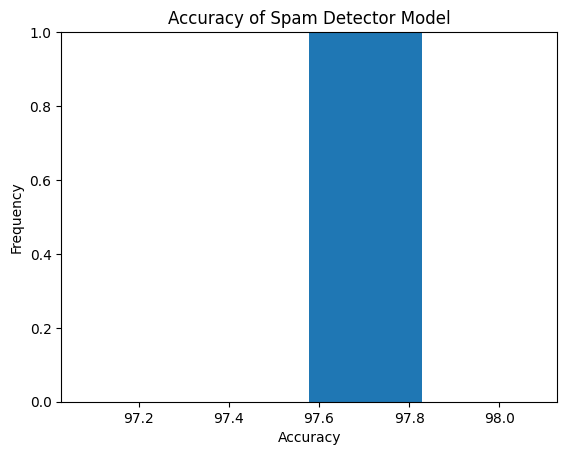

In [35]:
plt.hist([accuracy],bins=4)
plt.ylim(0,1) 
plt.xlabel("Accuracy")
plt.ylabel('Frequency')
plt.title('Accuracy of Spam Detector Model')
plt.show()